In [9]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
img=cv2.imread('C:/Users/user/Desktop/hh.jpg',0)

In [11]:
def quantize_error(error, levels):
    max=255;
    min=-255;

    q = (max-min)/levels
    i = 1
    while error > min+q*i:
        i=i+1
    
    quantized_error = min+q*i
    return quantized_error

In [12]:
def DPCM_encoder(img,levels):
    n,m=img.shape
    N=n*m
    im=img.reshape(N)
    quantized_error=np.zeros(im.shape)
    predictor=np.zeros(im.shape)
    
    for i in range(N):
        #xi''
        if i==0:
            predicted=0
        else:
            predicted=predictor[i-1]
        error=im[i]-predicted   #ei
        quantized_error[i]=quantize_error(error,levels)#ei'
        predictor[i]=predicted+quantized_error[i]#xi'
        
    quantized_error=quantized_error.reshape((n,m))
    predictor=predictor.reshape((n,m))
    return quantized_error,predictor

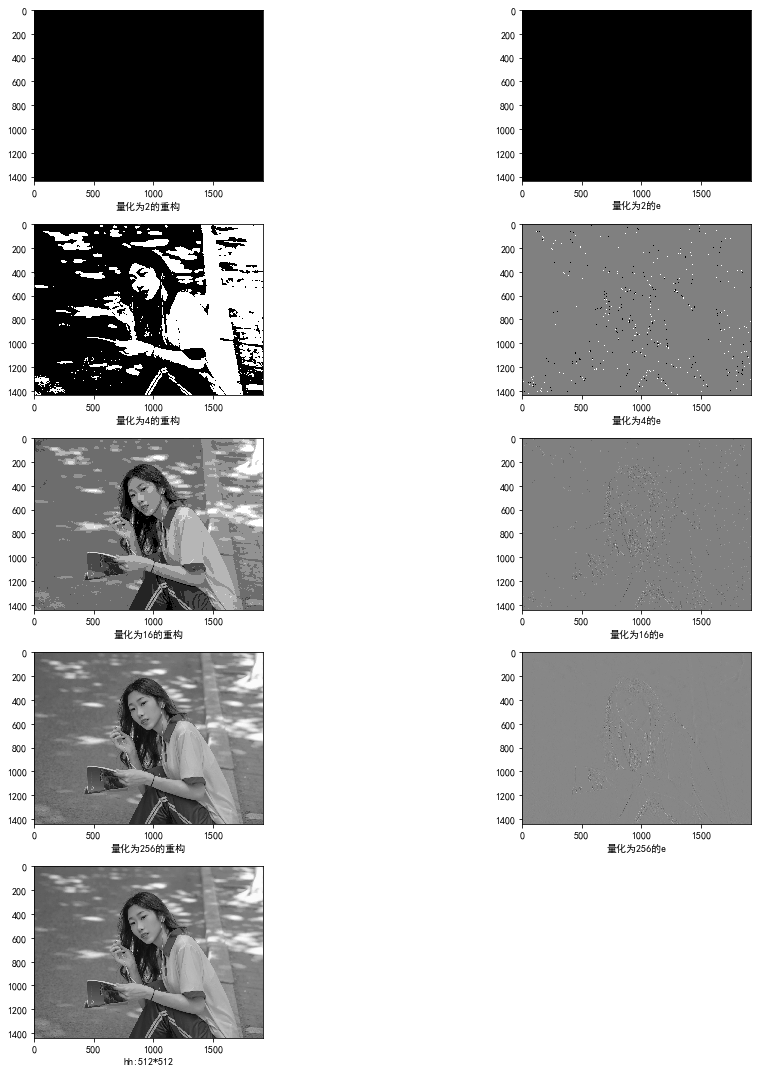

In [13]:
QP=[2,4,16,256]
#量化QP为2
error1,reconstructed1 = DPCM_encoder(img, QP[0])
#量化QP为4
error2,reconstructed2 = DPCM_encoder(img, QP[1]);
#量化QP为16
error3,reconstructed3 = DPCM_encoder(img, QP[2]);
#量化QP为256
error4,reconstructed4 = DPCM_encoder(img, QP[3]);

plt.figure(figsize=(15, 15))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(521), plt.imshow(reconstructed1, 'gray'),plt.xlabel('量化为2的重构')
plt.subplot(522), plt.imshow(error1, 'gray'),plt.xlabel('量化为2的e')
plt.subplot(523), plt.imshow(reconstructed2, 'gray'),plt.xlabel('量化为4的重构')
plt.subplot(524), plt.imshow(error2, 'gray'),plt.xlabel('量化为4的e')
plt.subplot(525), plt.imshow(reconstructed3, 'gray'),plt.xlabel('量化为16的重构')
plt.subplot(526), plt.imshow(error3, 'gray'),plt.xlabel('量化为16的e')
plt.subplot(527), plt.imshow(reconstructed4, 'gray'),plt.xlabel('量化为256的重构')
plt.subplot(528), plt.imshow(error4, 'gray'),plt.xlabel('量化为256的e')
plt.subplot(529), plt.imshow(img, 'gray'),plt.xlabel('hh:512*512')
plt.tight_layout()
plt.show()

In [23]:
from skimage.measure import compare_ssim, compare_psnr, compare_mse

In [25]:
ssim_1= compare_ssim(img,reconstructed1)
ssim_2 = compare_ssim(img,reconstructed2)
ssim_4 = compare_ssim(img,reconstructed3)
ssim_8 = compare_ssim(img,reconstructed4)
print(ssim_1,ssim_2,ssim_4,ssim_8)

D:\Python\lib\site-packages\skimage\measure\_structural_similarity.py:149: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
D:\Python\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.6312035743967259 0.7203665575632258 0.841767176923124 0.9969427965670546


In [26]:
psnr_1=compare_psnr(img,reconstructed1)
psnr_2=compare_psnr(img,reconstructed2)
psnr_4=compare_psnr(img,reconstructed3)
psnr_8=compare_psnr(img,reconstructed4)
print(psnr_1,psnr_2,psnr_4,psnr_8)

5.410007725495408 11.48254158485307 23.08623613692159 47.02793811970906


D:\Python\lib\site-packages\skimage\measure\simple_metrics.py:133: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
